In [20]:
%pip install pyclustering
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from pyclustering.cluster import gmeans, xmeans
import itertools

Note: you may need to restart the kernel to use updated packages.


Trial 1 - Number of clusters: 3
Trial 2 - Number of clusters: 6
Trial 3 - Number of clusters: 7
Trial 4 - Number of clusters: 10


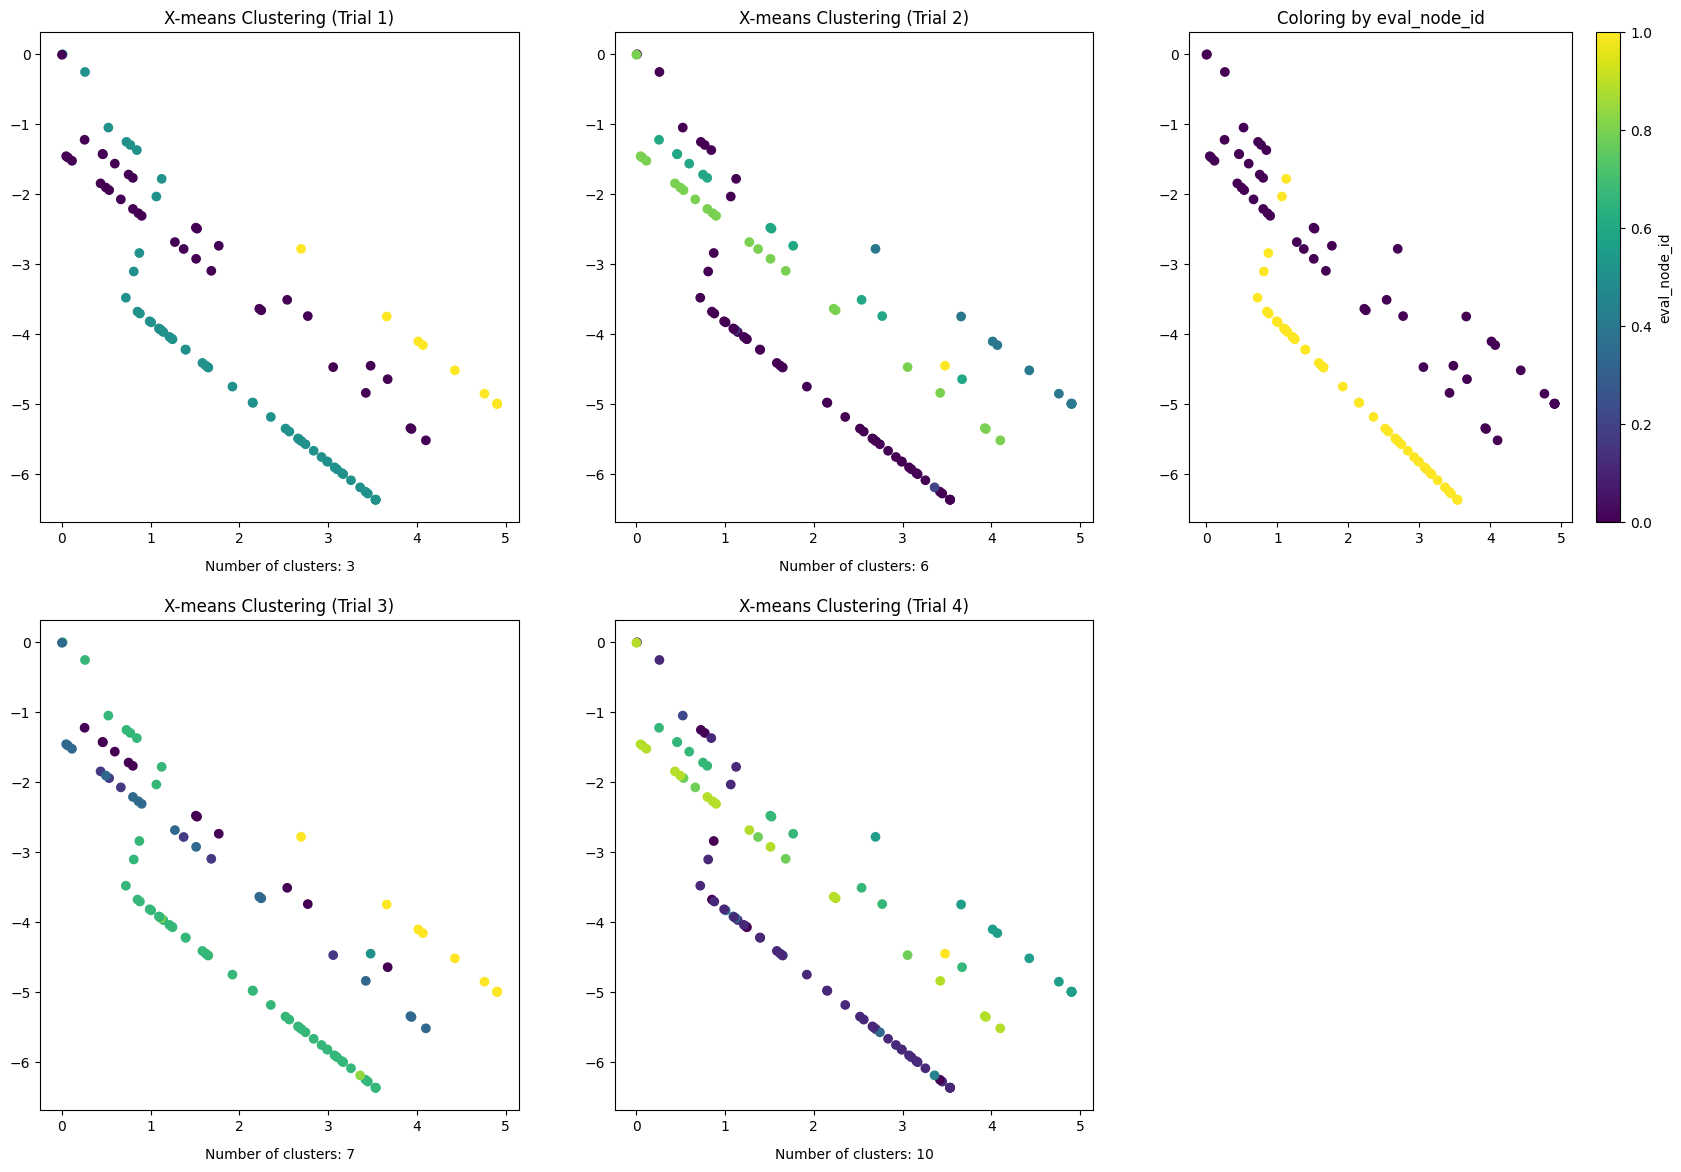

Trial 1 - Number of clusters: 2
Trial 2 - Number of clusters: 2
Trial 3 - Number of clusters: 2
Trial 4 - Number of clusters: 2


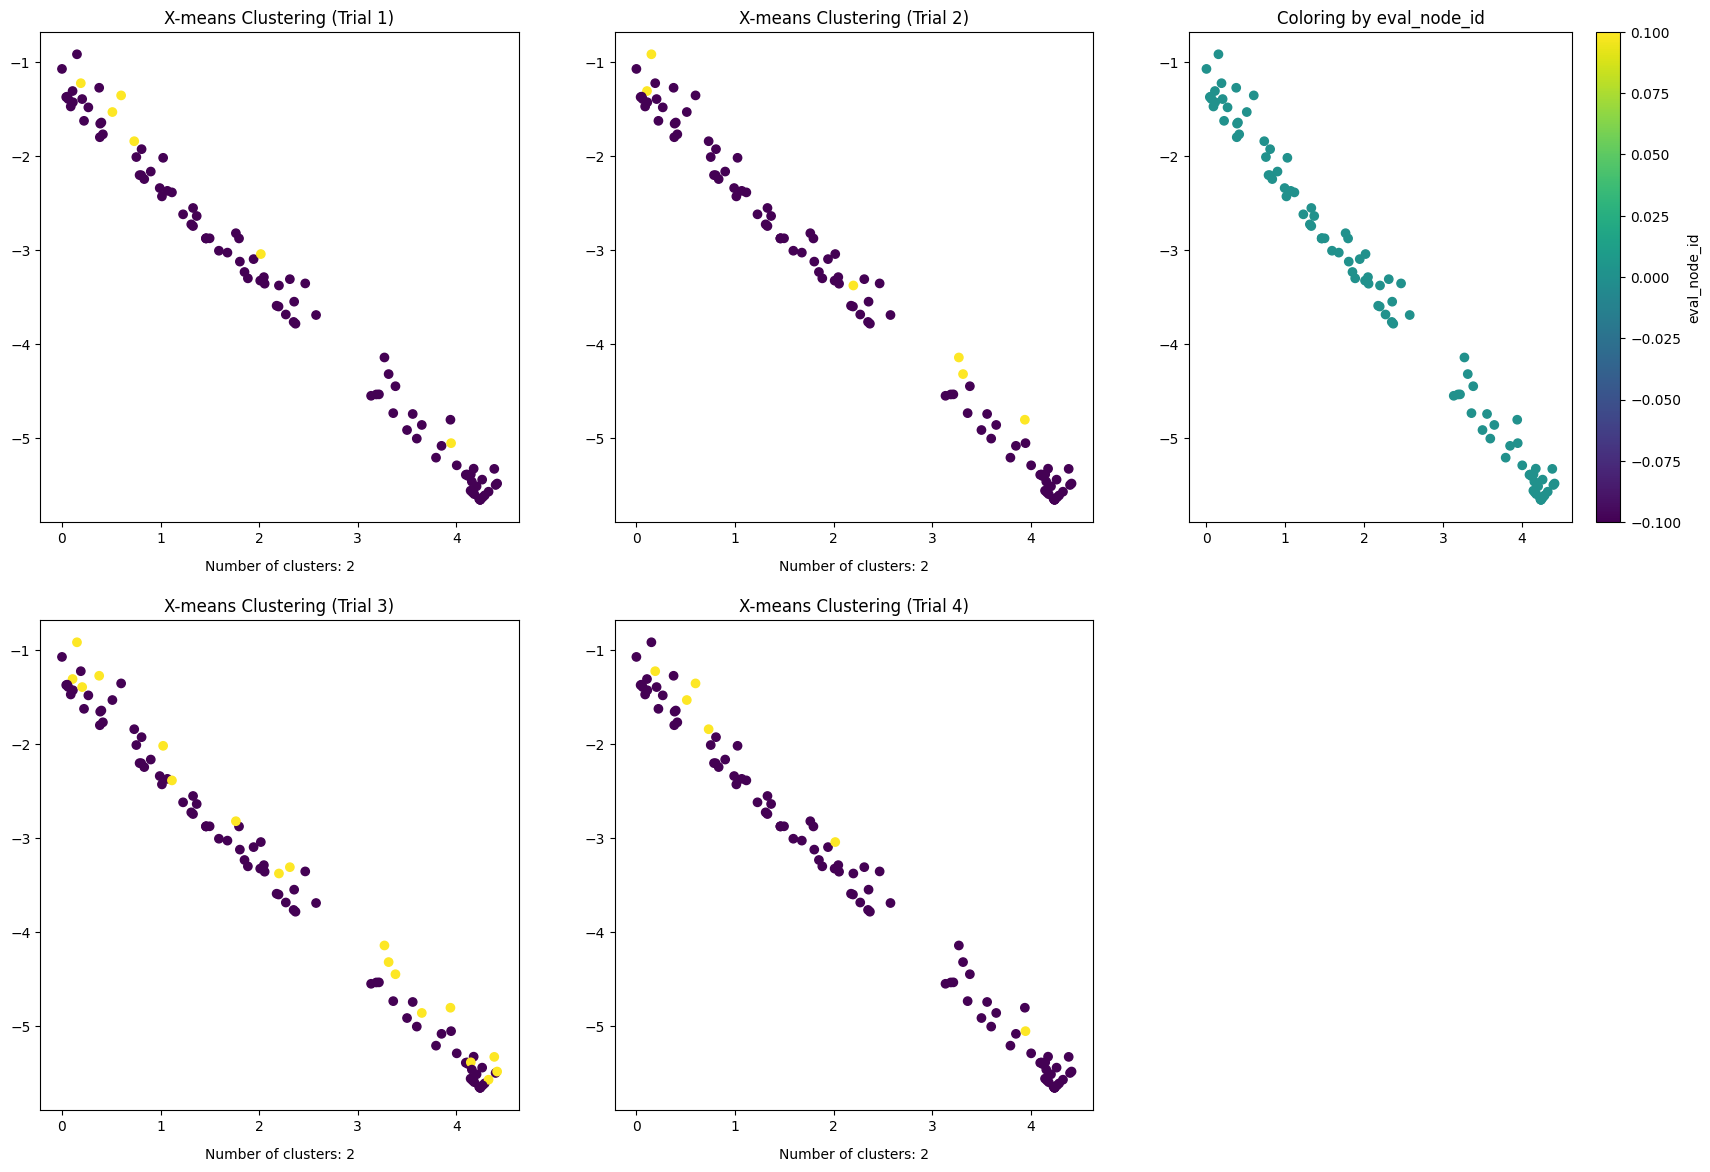

Trial 1 - Number of clusters: 10
Trial 2 - Number of clusters: 7
Trial 3 - Number of clusters: 8
Trial 4 - Number of clusters: 6


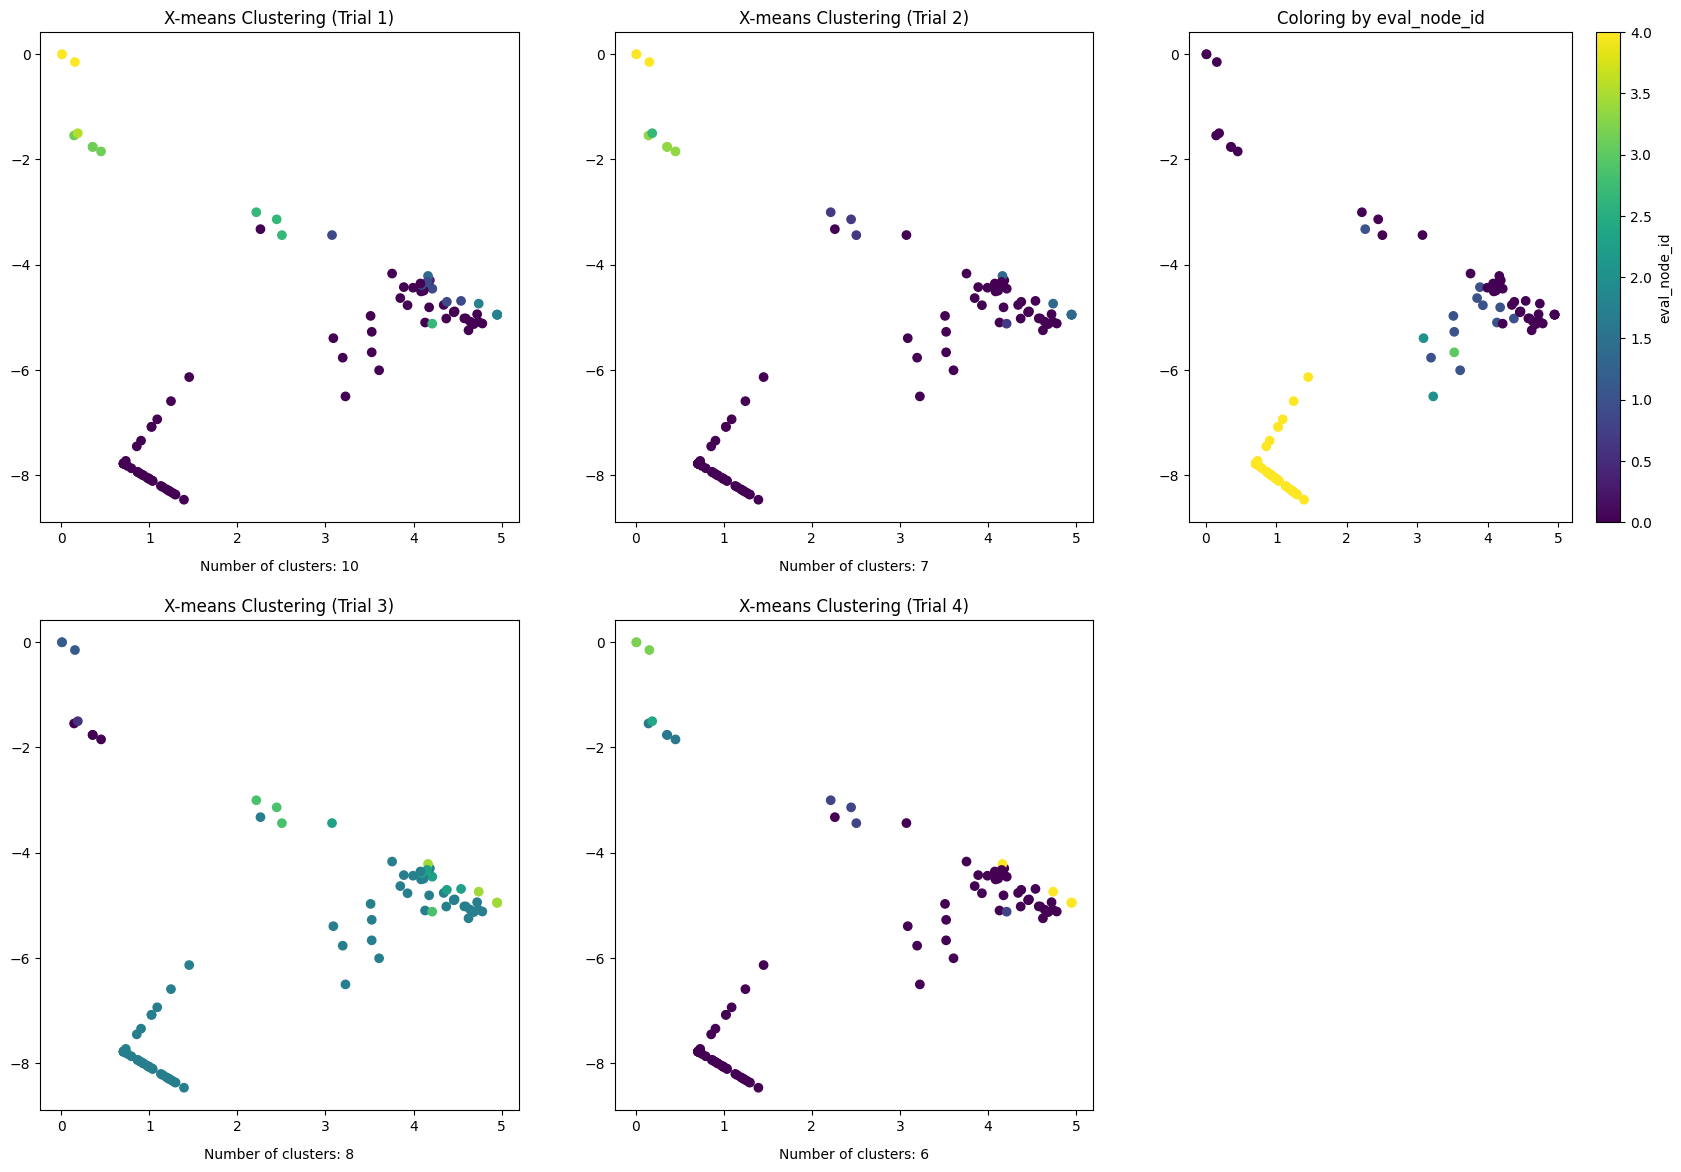

Trial 1 - Number of clusters: 2
Trial 2 - Number of clusters: 2
Trial 3 - Number of clusters: 3
Trial 4 - Number of clusters: 3


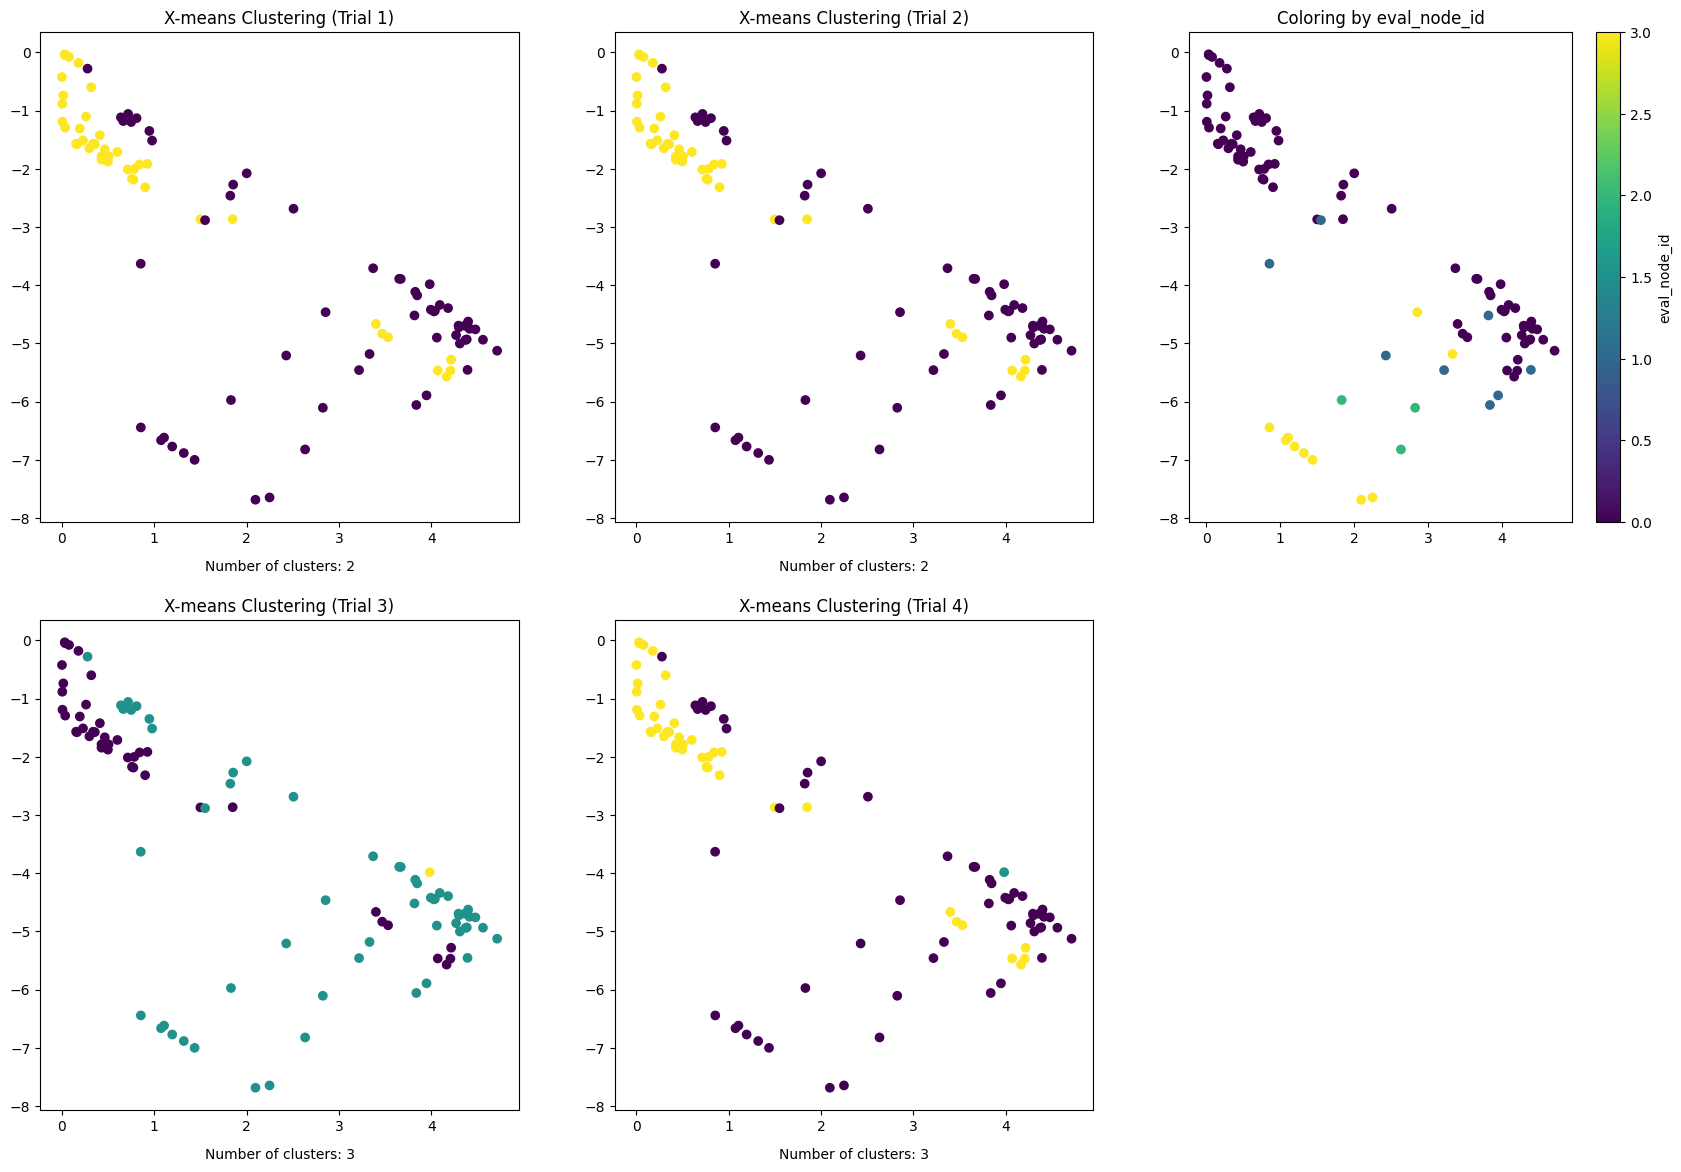

Trial 1 - Number of clusters: 2
Trial 2 - Number of clusters: 2
Trial 3 - Number of clusters: 3
Trial 4 - Number of clusters: 2


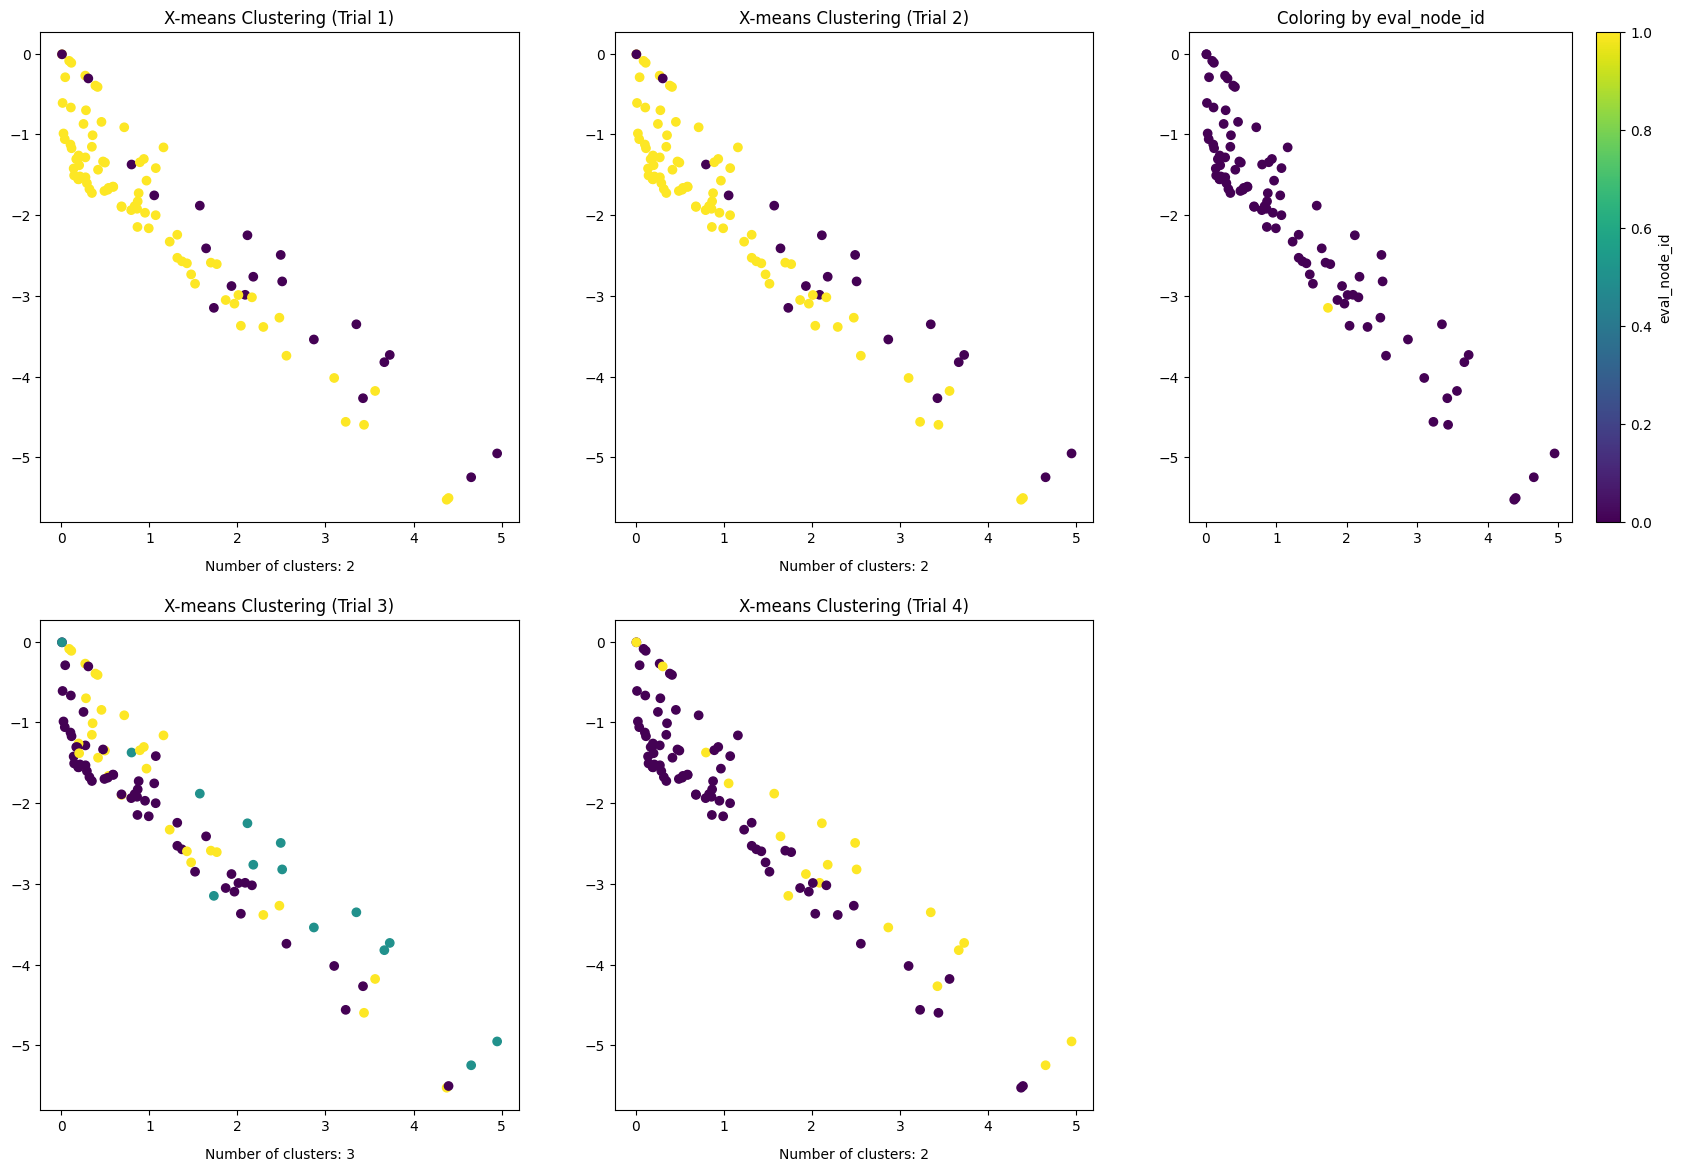

In [21]:
import pandas as pd
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import matplotlib.pyplot as plt
import numpy as np

set = [
    "/local/pareto_benchmark/benchmark-visualizer/data/benchmark-visualizer-exp-data/pop100_50000iter/exp_csvs/GDE3_depth_base_2_2_StoppingByEvaluations_2023-03-22T11-05-25.335069.csv",
    "/local/pareto_benchmark/benchmark-visualizer/data/benchmark-visualizer-exp-data/pop100_50000iter/exp_csvs/IBEA_depth_base_2_2_StoppingByEvaluations_2023-03-22T11-09-23.905971.csv",
    "/local/pareto_benchmark/benchmark-visualizer/data/benchmark-visualizer-exp-data/pop100_50000iter/exp_csvs/MOEAD_depth_base_2_2_StoppingByEvaluations_2023-03-22T11-09-01.291020.csv",
    "/local/pareto_benchmark/benchmark-visualizer/data/benchmark-visualizer-exp-data/pop100_50000iter/exp_csvs/NSGAII_depth_base_2_2_StoppingByEvaluations_2023-03-22T11-06-12.030606.csv",
    "/local/pareto_benchmark/benchmark-visualizer/data/benchmark-visualizer-exp-data/pop100_50000iter/exp_csvs/OMOPSO_depth_base_2_2_StoppingByEvaluations_2023-03-22T11-06-48.802306.csv",
]

for point in set:
    # CSVファイルからデータを読み込む
    data = pd.read_csv(point)
    data = data.iloc[20002:20102]
    features_for_clustering = data[["x1", "x2"]].values
    features_for_plotting = data[["y1", "y2"]].values
    eval_node_ids = data["eval_node_id"].values

    # プロット作成
    fig, axes = plt.subplots(2, 3, figsize=(21, 14))

    # print(f"Result for {tree_name}")

    for i in range(4):
        # 初期クラスタセンターを設定
        initial_centers = kmeans_plusplus_initializer(
            features_for_clustering, 2
        ).initialize()

        # X-meansのインスタンスを作成
        xmeans_instance = xmeans(features_for_clustering, initial_centers, 10)

        # クラスタリングを実行
        xmeans_instance.process()

        # クラスタリング結果を取得
        clusters = xmeans_instance.get_clusters()

        # クラスターの数を表示
        number_of_clusters = len(clusters)
        print(f"Trial {i+1} - Number of clusters: {number_of_clusters}")

        # クラスタラベルを作成
        labels = np.zeros(len(features_for_clustering))
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        # クラスタリング結果のプロット
        row = i // 2
        col = i % 2
        axes[row, col].scatter(
            features_for_plotting[:, 0], features_for_plotting[:, 1], c=labels
        )
        axes[row, col].set_title(f"X-means Clustering (Trial {i+1})")
        # クラスター数をプロットに表示
        axes[row, col].text(
            0.5,
            -0.1,
            f"Number of clusters: {number_of_clusters}",
            transform=axes[row, col].transAxes,
            ha="center",
        )

    # eval_node_idに基づいた色分けプロット
    scatter = axes[0, 2].scatter(
        features_for_plotting[:, 0],
        features_for_plotting[:, 1],
        c=eval_node_ids,
        cmap="viridis",
    )
    axes[0, 2].set_title("Coloring by eval_node_id")

    # カラーバーの追加
    cbar = plt.colorbar(scatter, ax=axes[0, 2])
    cbar.set_label("eval_node_id")

    # 空白のサブプロットを非表示に
    axes[1, 2].axis("off")

    plt.show()
    # plt.savefig(f'{tree_name}_combined_plot.png')